# Lecture 6 - Uncertainty Propagation using Polynomial Chaos I

## Objectives

+ Objective 1: To introduce polynomial Chaos (PC) as an attractive 
and efficient way of dealing with such challenges in the context of complex systems 
+ objective 2: Learn about the basic polynomial chaos expansion 
+ Objective 3: Learn about the stochastic Galerkin method 


## Readings

+ Numerical Methods for Stochastic Computations: A Spectral Method Approach (Dongbin Xiu, 2010)

+ Uncertainty Quantification: Theory, Implementation, and Applications (Ralph C. Smith, 2014) 


## Challenges in classic UQ methods
There are serious problems with the classic UQ methods: 
+ Monte Carlo methods are flexible and general, but the convergence
rate is problematic: one digit requires 100 simulations 
+ Moment/Perturbation methods are too complex and intrusive to serve as a genral tool. 


How can be strive to improve this? 

MC approximates the density using piecewise constant samples - 

resulting in the slow pointwise convergence 


## Challenges in classic UQ methods 
We will: 
+ Make assumption on the nature of the aleatory uncertainty 
 through the input variables 
+ Make some assumptions on the character of the epistemic 
uncertainty, possibly using just uniformly distributed variables 


These are random variables with a smooth density 


From an approximation standpoint of view, using piecewise constant 
functions to represent a smooth function is a poor choice 


## Inspiration from global expansions 

Consider a smooth period function:

$$u(x)=\frac{3}{5-4 \cos(x)}$$
![](figures/gexp.png)


Challenge: How ot take advantae of this for UQ study? 


## The Wiener Chaos expansion 

Define the space of square integrable functions
$$L^2_{Fx}=\{f: I \rightarrow R | E[f^2] < \infty\}  $$


Provided $f \in L^2_{Fx},$ we have 

$$f(X)={\sum^\infty_{n=0}\hat{f}_n \Phi_n(X)}$$ 

$$\hat{f}_n=\frac{E[f(X)\Phi_n(X)]}{\gamma_n}, \; \gamma_n=E[\Phi^2_n(X)]$$ 

Where the Polynomial Chaos basis satisfies: 
$$E[\Phi_m(X)\Phi_n(X)]=\int{\Phi_m(X(x))\Phi_n(X(x))}dF_x(x)=\gamma_n \delta_{mn}$$ 
Basis depends on the distribution of the random variable! 


## The Wiener Chaos expansion 

Consider Gaussian variables with 
$$ f_X(x)=\frac{1}{\sqrt{2\pi}}\exp^{-x^2/2}  $$
The corresponding polynomials are the Hermite Polynomials 

$H_o(X)=1$, $H_1(X)=X$, $H_2(X)=X^2-1$, $H_3(X)=X^3-3X$ 
![](figures/hermite.png)


## The Wiener Chaos expansion 

If we now consider the truncated expansion 
$$ P_N f(X)=\sum_{n=0}^{N}\hat{f}_n\Phi_n(X) $$
The strong convergence follows directly from classic theory 

$$||f-P_N f||_{L^2_{Fx}} \rightarrow 0, \; N \rightarrow \infty$$ 

If we now consider a more general problem

$$Z_N=\sum_{n=0}^{N}\hat{a}_n\Phi_n(X), \;X \in L^2_{Fx},\; Z \in L^2_{Fz}. $$
Weak convergence can be achieved by defining

$$\hat{a}_n=\frac{1}{\gamma_n} E_X[F^{-1}_{Z}(F_X(X))\Phi_n(X)]$$

We can use one random variable to approximate another.


## The Wiener Chaos expansion 

![](figures/pcapprox.png)

It is clear that choosing the right basis - associated with the nature of the random variable - is the key to performance 

This is the advantage and the curese - as we shall see.


## The Wiener Chaos expansion 

The extension to multiple random variables follows:
Define:
$$F_{Xi}(X_i)=P(X_i \leq x_i), \; x_i \in I_{Xi}, $$ 

$$X=(X_1,...,X_d),\; F_X=F_{X1} \times ...\times F_{Xd} $$ 

and the multi-dimensional polynomial chaos 

$$\Phi_i(X)=\Phi_{i1}(X_1) \times ... \times \Phi_{id}(X_d),\; |i| \leq N,$$ 

$$E[\Phi_i(X)\Phi_j(X)]=\int {\Phi_i(x)\Phi_j(x)dF_X(x)=\gamma_i \delta_{ij},\; \gamma_i=E[\Phi_i^2]}. $$ 

The homogeneous Chaos expansion is: 

$$f_N(X)=\sum_{|i|=0}^N \hat{f}_i\Phi_i(X) \in P_N^d,\; dim P_N^d=\frac{(N+d)!}{N!d!} $$

The 'curse of dimension' shows its face!


## The Wiener Chaos expansion 

Assuming the Chaos expansion is known, we need statistics:
$$f_N(\textbf{X})= \sum_{|i|=0}^N \hat{f}_i\Phi_i(\textbf{X}) \in P_N^d. $$
The expectation follows from:

$$\mu=E[f] \approx E[f_N]=\int{\sum_{|i|=0}^N \hat{f}_i\Phi_i(\textbf{X})}dF_X=\hat{f}_0$$ 

In a similar fashion, the variance is
$$var(f)=E[(f-\mu)^2]\approx \sum_{|i|>0}^N \gamma_i \hat{f}_i^2$$ 

Other moments can be obtained in a similar fashion. 

Functions of the expansion can also be estimated through Monte Carlo sampling. 


## Summary of What we have discussed

+ We have discussed the shortcomings of classic
methods such as Monte Carlo methods.
+ We have realized that smoothness in the behaviro of 
the random variables shoudl be explored.
+ We have introduced the Polynomial Chaos to achieve this goal. 
+ We will use this insight to solve differential 
equations and demonstrate the promised benefits. 


## Building Blocks for Polynomial Chaos: Orthogonal Polynomials
Consider the random variable:
$$
\xi \sim p(\xi) = \mathcal{N}(0, 1).
$$
The orthogonal polynomials with respect to $p(\xi)$, i.e., the $\phi_i(\xi)$ such that:
$$
\langle \phi_i \phi_j \rangle = \int \phi_i(\xi) \phi_j(\xi) p(\xi)d\xi = \delta_{ij},
$$
can be found with ``orthpol``.

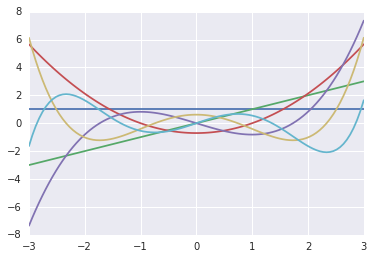

In [55]:
import numpy as np
import scipy.stats as st
import orthpol
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
xi = st.norm()
degree = 5
phi = orthpol.OrthogonalPolynomial(degree, xi)
xis = np.linspace(-3, 3, 100)
plt.plot(xis, phi(xis))

## Building Blocks for Polynomial Chaos: Quadrature Rules

A quadrture rule is a set of weihts and points, $\{(w^{(n)}, \xi^{(n)})\}_{n=1}^N$, that allows us to approximate expectations of arbitrary functions $f(\xi)$ with respect to $p(\xi)$ as follows:
$$
\langle f(\xi) \rangle \equiv \int f(\xi)p(\xi)d\xi \approx \sum_{n=1}^Nw^{(n)}f(\xi^{(n)}).
$$
Let's use ``orthpol`` to construct such a quadrature rule for our normal random variable. We will use $N=500$ quadature points.

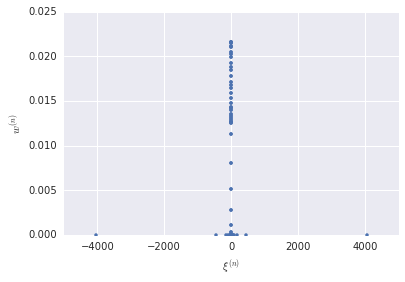

In [56]:
quad = orthpol.QuadratureRule(left=-np.inf, right=np.inf, wf=xi.pdf, ncap=100)
plt.plot(quad.x, quad.w, '.')
plt.xlabel(r'$\xi^{(n)}$')
plt.ylabel(r'$w^{(n)}$')

Let's use this quadrature to verify the orthonormality of the weights, i.e., that:
$$
\langle \phi_i \phi_j \rangle = \delta_{ij}.
$$
To check this, we will comute the matrix:
$$
\Delta_{ij} = \sum_{n=1}^N w^{(n)} \phi_i(\xi^{(n)})\phi_j(\xi^{(n)}),
$$
and compare it to the identity matrix.

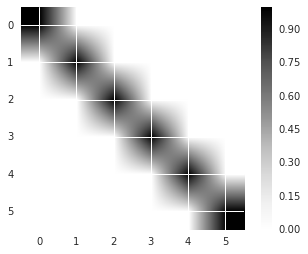

In [64]:
Phi = phi(quad.x)
delta = np.einsum('n,ni,nj->ij',quad.w, Phi, Phi)
plt.imshow(delta)
plt.colorbar()

In [63]:
print np.diag(delta)

[ 0.99999976  0.99999674  1.00001608  1.00025015  1.00022865  0.99566874]


## Discussion about smoothness assumption

+ The assumption of smoothness is no the random variable
+ Not on the solution 
![](figures/smoothness.png)


## Stochastic Galerkin methods
+ A brief reminder
+ Stochastic Galerkin method for SODEs
+ Stochastic Galerkin method for SPDEs
+ Extensions to non-Gaussian variables
+ Summary of what we have discussed


## A brief reminder

Through a series of arguments we realized:

+ We need to be able to quantify with the impact of uncertainty in modeling of complex systems
+ While MC is tested and tried, its cost is problematic for complex systems and/or high accuracy requirements
+ For many systems, the random variables have smooth densities and this we should explore
+ We introduced the Wiener Chaos expansion for this purpose


## A brief reminder

We introduced the homogeneous Chaos expansion:
$$f_N(X)=\sum_{|i|=0}^N \hat{f}_i\Phi_i(X) \in P_N^d,\; dim P_N^d=\frac{(N+d)!}{N!d!} $$

to represent functions of d-dimensional random vectors

$$X=(X_1,...,X_d)$$

$$ F_{Xi}(X_i)=P(X_i \leq x_i), \; x_i \in I_{Xi}, $$ 

$$F_X=F_{X1} \times ...\times F_{Xd} $$ 

Here we define the Polnomial Chaos

$$ \Phi_i(X)=\Phi_{i1}(X_1) \times ... \times \Phi_{id}(X_d),\; |i| \leq N,$$ 

$$ E[\Phi_i(X)\Phi_j(X)]=\int {\Phi_i(x)\Phi_j(x)dF_X(x)=\gamma_i \delta_{ij},\; \gamma_i=E[\Phi_i^2]}. $$ 

For Gaussian variables, these are known as Hermite Polynomial


## Stochastic Galerkin for SODEs

Let us see how we can use these development:

+ We consider again the simple ODE
$$
\frac{dy}{dt} = ky,
$$
with $y(0) = y_0$ where $k$ is an uncertain constant.
Note: This is very simple problem for illustration only!


## Case Studies: Solving Stochastic ODEs via the Stochastic Galerkin Approach
Let us use now these ideas to solve the following ODE with random coefficients. Consider the problem:
$$
\frac{dy}{dt} = ky,
$$
with $y(0) = y_0$ where $k$ is an uncertain constant. Assume that the uncertainty in $k$ can be expressed as follows:
$$
k \sim \mathcal{N}(\mu, \sigma^2).
$$
This random variable has the nice property that it can be expressed in terms of a $\xi\sim\mathcal{N}(0,1)$ in a very straightforward way:
$$
k = \mu + \sigma\xi.$$


What simplifies the analysis significantly is actually expanding $k$ in the $\phi_i(\xi)$'s, i.e., by writing:
$$
k = \sum_{i=1}^{d_k} k_i\phi_i(\xi).
$$
In this case, this is trivial to do by hand, but let's do it the formal way.
Multiplying both sides by $\phi_j(\xi)$ and taking the expectation of $\xi$ yields:
$$
k_i = \langle k\phi_i\rangle = \int k(\xi)\phi_i(\xi)p(\xi)d\xi \approx \sum_{n=1}^Nw^{(n)}k(\xi^{(n)})\phi_i(\xi^{(n)}).
$$
Let's see what expansion we would get for $\mu = 0.1$ and $\sigma=0.01$:

In [68]:
k = lambda(xi): 0.1 + 0.01 * xi
k_coeff = np.einsum('n,n,ni', quad.w, k(quad.x), Phi)
print k_coeff

[  9.99999881e-02   9.99998368e-03  -2.13933342e-07   1.45623142e-07
   9.13355789e-07   1.25470313e-06]


As exected, to numerical accuracy, we find that k has just two significant coefficients.

We will expand the solution of the ODE, $y(t;\xi)$, in the basis formed by the $\phi_i(\xi)$'s, i.e., we will have:
$$
y(t;\xi) = \sum_{i=1}^\infty y_i(t)\phi_i(\xi).
$$
Of course, at the end of the day, we will just keep 5-6 terms of this expansion so that the sum is finite. We have, by differentiating both sides of the above equation:
$$
\sum_{i=1}^{d_y} \dot{y_i}\phi_i(\xi) = \dot{y} = ky = \left(\sum_{i=1}^{d_k} k_i\phi_i(\xi)\right)\left(\sum_{j=1}^{d_y} y_j\phi_j(\xi)\right).
$$
Joining the sums on the RHS, we get:
$$
\sum_{i=1}^{d_y} \dot{y_i}\phi_i(\xi) = 
\sum_{i=1}^{d_k} \sum_{j=1}^{d_y} k_i\phi_i(\xi)y_j\phi_j(\xi)$$


Now, we multiply both terms by $\phi_k(\xi)$ and take the expecation over $\xi$. This yields:
$$
\sum_{i=1}^{d_y} \dot{y_i}\langle \phi_i\phi_k\rangle = \sum_{i=1}^{d_k}\sum_{j=1}^{d_y} k_i y_j\langle \phi_i\phi_j\phi_k\rangle.
$$
Now, notice that because of the orthonormality of the basis functions, we have $\langle\phi_i\phi_k\rangle=\delta_{ij}$ so that the LHS can be simplified significantly.
Therefore, the stochastic ODE becomes equivalent to the following (theoretically) infinite dimensional dynamical system:
$$
\dot{y}_k = \sum_{i=1}^{d_k}\sum_{j=1}^{d_y} k_i H_{ijk}y_j,
$$
for $k=1,\dots,d_y$, where we have introduced the 3D array:
$$
H_{ijl} = \langle \phi_i \phi_j \phi_k\rangle = \int \phi_i(\xi)\phi_j(\xi)\phi_k(\xi)p(\xi)d\xi.
$$

To find the initial conditions of the this dynamical system, all we have to do is expand $y(t=0;\xi) = y_0$ in the same basis. We, trivially, have:
$$
y_k(t=0) = \langle y_0 \phi_k\rangle,
$$
for $k=1,\dots,d_y$. If $y_0$ does not depend on $\xi$, e.g., if it is a constant, then we trivially get:
$$
y_1(t=0) = y_0,
$$
and
$$
y_k(t=0) = 0,
$$
for $k=2,\dots,d_y$.

To wrap it up, it all boils down to solving the following initial value problem:
$$
\dot{y}_k = \sum_{i=1}^{d_k}\sum_{j=1}^{d_y} k_i H_{ijk}y_j,
$$
$$
y_1(t=0) = y_0,
$$
and
$$
y_k(t=0) = 0,
$$
for $k=2,\dots,d_y$.

The only thing we are actually missing is the 3D array:
$$
H_{ijk} = \langle \phi_i \phi_j \phi_k\rangle = \int \phi_i(\xi)\phi_j(\xi)\phi_k(\xi)p(\xi)d\xi \approx \sum_{n=1}^{N}w^{(n)}\phi_i(\xi^{(n)})\phi_j(\xi^{(n)})\phi_k(\xi^{(n)})
$$
Here is how we can compute it:

In [65]:
H = np.einsum('n,ni,nj,nk->ijk', quad.w, Phi, Phi, Phi)

Alright, let's solve the system numerically. We are going to use the functionality of ``scipy`` to do this. The only thing we need to worry about is implementing the RHS of the dynamical system. This is easy:

In [86]:
def rhs(y, t, k_coeff, H):
    """
    Evaluates the RHS of the dynamical system that is equivalent to the random ODE.
    """
    return np.einsum('i,ijk,j->k', k_coeff, H, y)

Let's solve the problem.

In [88]:
import scipy.integrate
# The expansion of y(t;xi) has this dimensionality
d_y = degree + 1
# The initial condition:
y0 = np.zeros((d_y,))
y0[0] = 1.
# We are going to solve until this time
T = 5.
# and we want the result on these timesteps:
t = np.linspace(0, T, 500)
# Here we go:
y = scipy.integrate.odeint(rhs, y0, t, args=(k_coeff, H))

Let's visualize the results. We start with the coefficients $y_k(t)$.

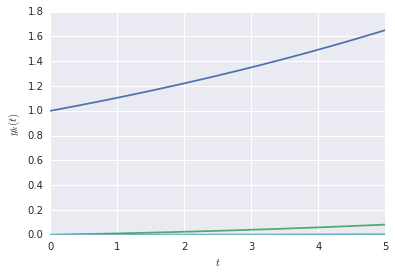

In [100]:
plt.plot(t, y)
plt.xlabel('$t$')
plt.ylabel('$y_k(t)$')

Now, let's do some of the statistics. The mean of the response is:
$$
\mathbb{E}_\xi[y(t;\xi)] = y_1(t).
$$
The variance of the response is:
$$
\mathbb{V}_{\xi}[y(t;\xi] = \sum_{k=2}^{d_y}y_k^2(t).
$$
Let's use them to plot 95% predictive error bars:

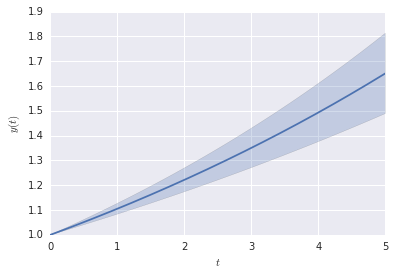

In [103]:
# Mean
y_m = y[:, 0]
# Variance
y_v = np.sum(y[:, 1:] ** 2., axis=1)
# Standard deviation
y_s = np.sqrt(y_v)
# Lower predictive bound
y_l = y_m - 1.96 * y_s
# Upper predictive bound
y_u = y_m + 1.96 * y_s
# Plot it
plt.plot(t, y_m)
plt.fill_between(t, y_l, y_u, alpha=0.25)
plt.xlabel('$t$')
plt.ylabel('$y(t)$')

## Stochastic Galerkin for SODEs

![](figures/gpcode1.png)


## Stochastic Galerkin for SODEs

A few observations are work making

+ Solving with the mean coefficients is not sufficient
+ A stochastic scalar problem becomes a deterministic system 
+ Some work is needed to derive system and matrix entries $e_{ijk}=E[H_i H_j H_k]$
+ System is only coupled with multiplicative randomness 
+ Spectral convergence is clear, i.e., we have recovered the benefits of global expansions form PDE solvers 


## Comparison to Monte Carlo
Just for fun, let's draw some samples of $\xi$, solve the problem for each one of them, and plot the results on top of the previous plot. We have done a good job only if the drawn samples fall within the bounds we derived. Let's see.

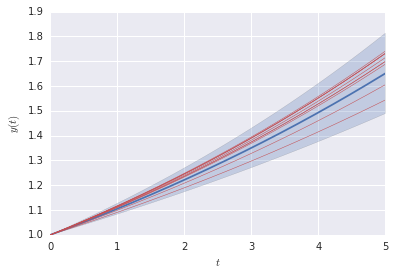

In [116]:
# RHS for the deterministic problem (k fixed)
def rhs_deter(y, t, k):
    return k * y
# Plot the solution we got with polynomial chaos:
plt.plot(t, y_m)
plt.fill_between(t, y_l, y_u, alpha=0.25)
plt.xlabel('$t$')
plt.ylabel('$y(t)$')
# And let's do 5 samples of xi
for i in xrange(10):
    xi = np.random.randn()
    k = 0.1 + 0.01 * xi
    y_sample = scipy.integrate.odeint(rhs_deter, [1.], t, args=(k,))
    plt.plot(t, y_sample, linewidth=0.5, color=sns.color_palette()[2])

Let's do another test. Let's try to compare the mean and the variance we found with polynomial chaos, with the one we would have found with Monte Carlo. We will take 10,000 samples just to be sure that we have converent statistics.

In [120]:
# Accumulator for y(t;\xi)
y_mc = np.zeros(t.shape)
# Accumulator for y(t;\xi) ** 2
y_mc2 = np.zeros(t.shape)
# The number of samples to take:
num_samples = 10000
# Start sampling
for i in xrange(num_samples):
    xi = np.random.randn()
    k = 0.1 + 0.01 * xi
    y_sample = scipy.integrate.odeint(rhs_deter, [1.], t, args=(k,)).flatten()
    y_mc += y_sample
    y_mc2 += y_sample ** 2
# The mean statistic through Monte Carlo
y_mc_m = y_mc / num_samples
# The variance statistic through Monte Carlo
y_mc_v = y_mc2 / num_samples - y_mc_m ** 2

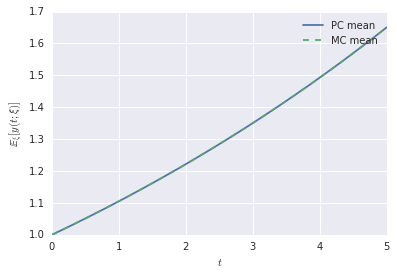

In [129]:
# Comparing the means:
plt.plot(t, y_m, label='PC mean')
plt.plot(t, y_mc_m, '--', label='MC mean')
plt.legend()
plt.xlabel('$t$')
plt.ylabel(r'$\mathbb{E}_{\xi}[y(t;\xi)]$')

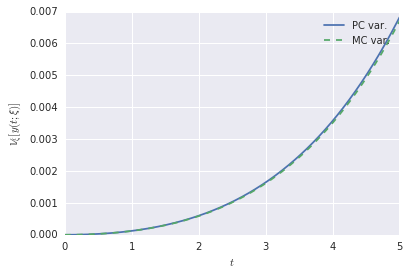

In [130]:
# Comparing the variances:
plt.plot(t, y_v, label='PC var.')
plt.plot(t, y_mc_v, '--', label='MC var.')
plt.legend()
plt.xlabel('$t$')
plt.ylabel(r'$\mathbb{V}_{\xi}[y(t;\xi)]$')

## Stochastic Galerkin for SODEs

![](figures/gpcode2.png)


## Stochastic Galerkin for SODEs

![](figures/gpcode3.png)


## Stochastic Galerkin for SODEs

![](figures/gpcode4.png)


## Stochastic Galerkin for SODEs

![](figures/gpcode5.png)


## Stochastic Galerkin for SODEs

Let us summarize our results for SDEs

+ Approach is systematic

SDE scalar problems leads to deterministic coupled systems of ODEs 

Results for both linear and non-linear are convincing and the potential for savings significant.

Question: What changes for SPDEs?


## Stochastic Galerkin for SPDEs

![](figures/gpcode6.png)


## Stochastic Galerkin for SPDEs

![](figures/gpcode7.png)


## Stochastic Galerkin for SPDEs

![](figures/gpcode8.png)


## Stochastic Galerkin for SPDEs

![](figures/gpcode9.png)


## Stochastic Galerkin for SPDEs

![](figures/gpcode10.png)


## Stochastic Galerkin for SPDEs

![](figures/gpcode11.png)


## Stochastic Galerkin for SPDEs

![](figures/gpcode12.png)


## Stochastic Galerkin for SPDEs

![](figures/gpcode13.png)


## Stochastic Galerkin for SPDEs

![](figures/gpcode14.png)


## Stochastic Galerkin for SPDEs

![](figures/gpcode15.png)


## Stochastic Galerkin for SPDEs

![](figures/gpcode16.png)


## Stochastic Galerkin for SPDEs

![](figures/gpcode17.png)


## Stochastic Galerkin for SPDEs

![](figures/gpcode18.png)


## Stochastic Galerkin for SPDEs

![](figures/gpcode19.png)


## Stochastic Galerkin for SPDEs

![](figures/gpcode20.png)


## Stochastic Galerkin for SPDEs

![](figures/gpcode21.png)


## Non-Gaussian variables and gPC

![](figures/gpcode22.png)


## Non-Gaussian variables and gPC

![](figures/gpcode23.png)


## Non-Gaussian variables and gPC

![](figures/gpcode24.png)


## Non-Gaussian variables and gPC

![](figures/gpcode25.png)


## Non-Gaussian variables and gPC

![](figures/gpcode26.png)


## Non-Gaussian variables and gPC

![](figures/gpcode27.png)


## Non-Gaussian variables and gPC

![](figures/gpcode28.png)


## Non-Gaussian variables and gPC

![](figures/gpcode29.png)


## Non-Gaussian variables and gPC

![](figures/gpcode30.png)


## Summary of what we have discussed

![](figures/gpcode31.png)


## Stochastic Galerkin for SODEs

![](figures/gpcode32.png)
